# Class 06: Graphing in Python 2 part 1

Matplotlib - density plots & 2D graphics 

- Complete the activities as instructed by the professor

#### Import any packages we need below (update as we go):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Density Plots 


####  Creating a density plot

- Read in the 'circular.txt' data
- create a density plot
- switch the origin to the lower left


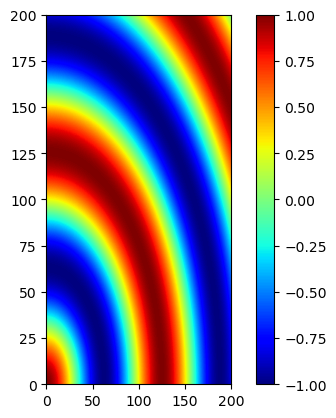

In [11]:
data = np.loadtxt("circular.txt",float)
plt.imshow(data, origin="lower", extent=[0,200,0,200], aspect=2.0)
plt.jet()
plt.colorbar()

#### Color-scales and colorbars
-  For the plot above: 
    - change the color-scale 
    - add a colorbar

#### Additional Density Plot Customizations 
- Play around with `extent` to see how it impacts the density plot 
- change the axis ratio using `aspect`

#### Book Example: Wave interference (page 108)

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time. If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x, y$ is

For the distance from the center of a circlular wave:

$$ r_1 = \sqrt{(x-x_1)^2+(y-y_1)^2} $$
and the height of the wave on a surface would be sinusoidal:

$$ h_1(x,y) = h_0\sin{kr_1} $$
where $k = 2\pi/\lambda$ is the wave vector. 

To superimpose two waves, we need a second set of distances and heights: 

$$ r_2 = \sqrt{(x-x_2)^2+(y-y_2)^2} $$

$$ h_2(x,y) = h_0\sin{kr_2} $$


The superposition is of the heights at any location: 

$$ h(x,y) = h_0\sin{kr_1} + h_0\sin{kr_2}$$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and the centers of the circles are 20 cm apart. Here is a program to make an image of the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $h$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 × 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

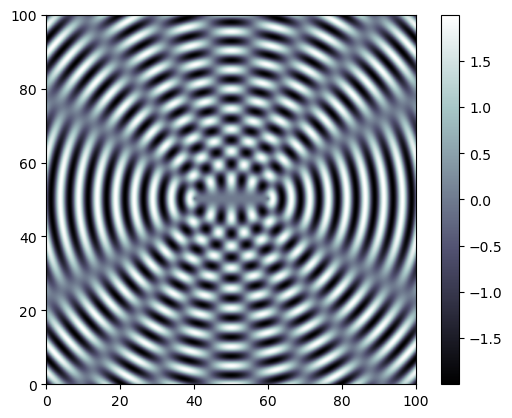

In [21]:
side = 100
seperation = 20
y_1 = side/2 - seperation/2
x_1 = side/2
y_2 = side/2 + seperation/2
x_2 = side/2
lam = 5
h_0 = 1
k=2*np.pi/lam

points = 500

a = np.zeros([points,points],float)
for i in range(points):
    for j in range(points):
        x = 100/points * i
        y = 100/points * j
        r_1 = np.sqrt((x-x_1)**2+(y-y_1)**2)
        r_2 = np.sqrt((x-x_2)**2+(y-y_2)**2)
        h_1 = h_0*np.sin(k*r_1)
        h_2 = h_0*np.sin(k*r_2)
        h = h_1+h_2
        a[i,j] = h

plt.imshow(a, origin="lower", extent = [0,side,0,side])
plt.bone()
plt.colorbar()

#### Create an array to make a density plot

Create an array that is 50x50 for a density plot. To do so: 
- create a 1D array `theta` that is 50 values equally spaced between 0 and 3$\pi$ 
- create an 2 arrays: each should be a 1D array that is $5\sin$(`theta`)
- Now, in a 2D array that is 50x50, loop through the add the two arrays together 

[[0.00000000e+00 9.55793144e-01 1.87633502e+00 ... 1.87633502e+00
  9.55793144e-01 1.83697020e-15]
 [9.55793144e-01 1.91158629e+00 2.83212817e+00 ... 2.83212817e+00
  1.91158629e+00 9.55793144e-01]
 [1.87633502e+00 2.83212817e+00 3.75267005e+00 ... 3.75267005e+00
  2.83212817e+00 1.87633502e+00]
 ...
 [1.87633502e+00 2.83212817e+00 3.75267005e+00 ... 3.75267005e+00
  2.83212817e+00 1.87633502e+00]
 [9.55793144e-01 1.91158629e+00 2.83212817e+00 ... 2.83212817e+00
  1.91158629e+00 9.55793144e-01]
 [1.83697020e-15 9.55793144e-01 1.87633502e+00 ... 1.87633502e+00
  9.55793144e-01 3.67394040e-15]]


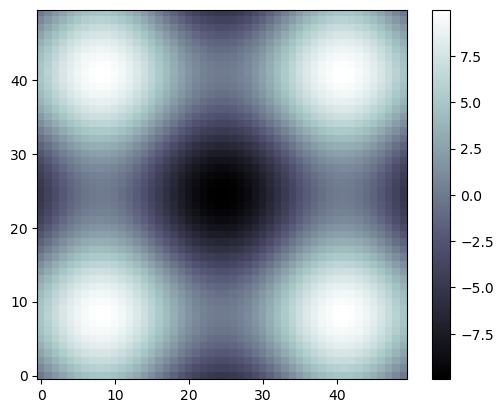

In [32]:
num = 50
theta = np.linspace(0,3*np.pi,num)
arr1 = 5*np.sin(theta)
arr2 = 5*np.sin(theta)


a = np.zeros([num,num],float)

x_ind = 0
y_ind = 0

for i in range(num):
    for j in range(num):
        a[i,j] = arr1[i] + arr2[j]
        
print(a)

plt.imshow(a,origin="lower", cmap='bone')
plt.colorbar()

## Drawings in Python

In [31]:
from qdraw import window, circle, square, show, draw
import numpy as np
import matplotlib.pyplot as plt
import math

#### Let's create a window that has a circle

- Note, you must use `draw()` for the separate window to pop up. It will remain open and continue to update each time you call `draw()` again 
    - you will have to restart the kernel when it is closed though! 
- You can alternatively use `show()` but if you then close the window, which you will have to, you will need to restart the kernel to do anything else. 

In [47]:
window(xlim=[-1,1],ylim=[-1,1])
circle(pos=[0,0], size=1, color="blue")
draw()

#### We can add a second circle that is green!

In [43]:
circle(pos=[0.5,0.5],size=0.5,color="green")
draw()

#### And we can put a lattice of squares on top of that. 

In [44]:
L = 1
s = 0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        square(pos=[i,j], size=s, color="#00ff00")
        draw(0.5)

#### Atomic Lattice Example

In [45]:
L = 5
s = 0.3

window(xlim=[-L,L],ylim=[-L,L], title="Atomic Lattice")
for i in range(-L,L+1):
    for j in range(-L,L+1):
        circle(pos=[i,j],size=s)
draw()

#### Let's make a circle move! 

In [46]:
window(xlim=[-1.1,1.1],ylim=[-1.1,1.1])
c = circle(size=0.2,pos=[1,0])
c.trail()
for theta in np.arange(0,10*math.pi,0.02):
    x = math.cos(theta)
    y = math.sin(theta)
    c.setpos(x,y)
    draw(0)